## Red neuronal feed-forward como función de aproximación

A continuación, se empleará una red neuronal feed-forward como función de aproximación para resolver la siguente ecuación diferencial:

$$\frac{d^2u}{dx^2} + u + x = 0 \enspace , $$

con condiciones de frontera $u(0)=u(1)=0$.

In [74]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
import torch.nn as nn
import warnings
warnings.filterwarnings("ignore")

In [59]:
# Red Neuronal
def funcion_aprox(x, input_layer, hidden_layer, output_layer):
    x = torch.tanh(input_layer(x))
    x = torch.tanh(hidden_layer(x))
    x = output_layer(x)
    return x

# Inicialización de parámetros
def initialize_parameters():
    input_layer = nn.Linear(1, 2)
    hidden_layer = nn.Linear(2, 2)
    output_layer = nn.Linear(2, 1)
    return input_layer, hidden_layer, output_layer

In [75]:
# Derivada
def derivative(dy, x, order=1):
    for _ in range(order):
        dy = torch.autograd.grad(dy, x, grad_outputs=torch.ones_like(dy), create_graph=True, retain_graph=True)[0]
    return dy

# Residuo
def residuo(x, input_layer, hidden_layer, output_layer):
    y = funcion_aprox(x, input_layer, hidden_layer, output_layer)
    return derivative(y, x, order=2) + y + x

# Función de pérdida
def loss_fn(x, input_layer, hidden_layer, output_layer):
    y = residuo(x, input_layer, hidden_layer, output_layer)
    return torch.mean(y ** 2)  # Error cuadrático medio

# Configuración de datos y parámetros
x = torch.tensor([1/5, 2/5, 3/5, 4/5], requires_grad=True).view(-1, 1)  
x_bc1 = torch.tensor([0.0], requires_grad=True) 
x_bc2 = torch.tensor([1.0], requires_grad=True) 

input_layer, hidden_layer, output_layer = initialize_parameters()

# Configuración del optimizador
params = list(input_layer.parameters()) + list(hidden_layer.parameters()) + list(output_layer.parameters())
optimizer = torch.optim.Adam(params, lr=0.01)

# Bucle de entrenamiento
num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()  # Limpiar gradientes previos
    loss_physics = torch.mean(residuo(x, input_layer, hidden_layer, output_layer) ** 2)
    loss_bc_1 = torch.mean(funcion_aprox(x_bc1, input_layer, hidden_layer, output_layer) ** 2)
    loss_bc_2 = torch.mean(funcion_aprox(x_bc2, input_layer, hidden_layer, output_layer) ** 2)
    current_loss = loss_physics + loss_bc_1 + loss_bc_2  # Calcular la pérdida
    current_loss.backward()  # Calcular gradientes
    optimizer.step()  # Actualizar parámetros

    if epoch % 100 == 0:  # Mostrar progreso cada 100 épocas
        print(f'Epoch {epoch}, Loss: {current_loss.item()}')

Epoch 0, Loss: 0.7704788446426392
Epoch 100, Loss: 0.04117979854345322
Epoch 200, Loss: 0.015097202733159065
Epoch 300, Loss: 0.004641540348529816
Epoch 400, Loss: 0.0007804674096405506
Epoch 500, Loss: 0.00015228736447170377
Epoch 600, Loss: 7.557171920780092e-05
Epoch 700, Loss: 6.106132786953822e-05
Epoch 800, Loss: 4.927019836031832e-05
Epoch 900, Loss: 3.82689613616094e-05


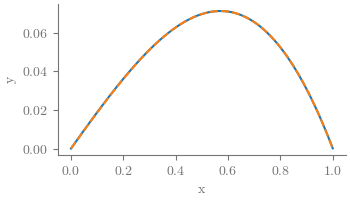

In [61]:
# Generar puntos para graficar
x = torch.linspace(0, 1, 100).view(-1, 1)
y_pred = funcion_aprox(x, input_layer, hidden_layer, output_layer).detach().numpy()
y_true = np.sin(x)/np.sin(1) - x

# Graficar la solución
fig = plt.figure(figsize=(3.5, 2.0))
plt.plot(x.numpy(), y_pred)
plt.plot(x,y_true,'--')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [53]:
np.linalg.norm(y_pred-y_true.detach().numpy(),2)/np.linalg.norm(y_true,2)

0.001568383